# Projeto de Machine Learning
## Insper 2023.2
### Alunos: Antônio Martins, Rafael Katri e Enricco Gemha
### Professor: Fabio Ayres

### Objetivo

O objetivo deste projeto é a partir de um dataset com dois times de pokemons, cada time com 6 pokemons, prever qual time ganhará a batalha.



### Dataset


### Código

#### Importando bibliotecas

In [28]:
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/output/matches.csv')
data.head()

,winner,pokemon1_p1,pokemon2_p1,pokemon3_p1,pokemon4_p1,pokemon5_p1,pokemon6_p1,pokemon1_p2,pokemon2_p2,pokemon3_p2,pokemon4_p2,pokemon5_p2,pokemon6_p2
0,1,Dondozo,Tatsugiri,Ogerpon,Iron Hands,Ninetales,Glimmora,Weezing,Landorus,Ogerpon,Heatran,Rillaboom,Iron Hands
1,1,Tornadus,Sinistcha,Basculegion,Iron Hands,Arcanine,Ninetales,Tornadus,Arcanine,Gastrodon,Rillaboom,Chi,Iron Valiant
2,2,Urshifu,Landorus,Ogerpon,Thundurus,Rillaboom,Kingambit,Armarouge,Indeedee,Torkoal,Ursaluna,Gallade,Urshifu
3,2,Gholdengo,Roaring Moon,Rillaboom,Arcanine,Urshifu,Kingambit,Ogerpon,Dondozo,Tatsugiri,Flutter Mane,Glimmora,Urshifu
4,1,Dondozo,Tatsugiri,Rillaboom,Volcarona,Kingambit,Scizor,Arcanine,Rillaboom,Tornadus,Flutter Mane,Urshifu,Chien


#### Tamanho de Vocabulário

In [3]:
vocabulary = set()

for col in data.columns:
    for value in data[col]:
        if isinstance(value, str):
            vocabulary.add(value)
vocabulary = list(vocabulary)
print('Vocabulary size:', len(vocabulary))
print('Vocabulary:', vocabulary)

Vocabulary size: 392
Vocabulary: ['Chien', 'Tatsugiri', 'Charmander', 'Bellibolt', 'Dunsparce', 'Cinderace', 'Muk', 'Brute Bonnet', 'Great Tusk', 'Staravia', 'Chesnaught', 'Noivern', 'Gogoat', 'Gothitelle', 'Pawmot', 'Vespiquen', 'Bellsprout', 'Crocalor', 'Piloswine', 'Polteageist', 'Delibird', 'Luxray', 'Mabosstiff', 'Braixen', 'Greninja', 'Pincurchin', 'Growlithe', 'Sneasel', 'Klawf', 'Qwilfish', 'Rotom', 'Torterra', 'Persian', 'Inteleon', 'Grotle', 'Cyclizar', 'Sunflora', 'Mimikyu', 'Duskull', 'Crawdaunt', 'Conkeldurr', 'Glimmora', 'Corviknight', 'Drakloak', 'Regidrago', 'Arboliva', 'Hattrem', 'Greedent', 'Landorus', 'Torkoal', 'Riolu', 'Crabominable', 'Skeledirge', 'Garganacl', 'Slowpoke', 'Slaking', 'Barraskewda', 'Chansey', 'Beartic', 'Clefairy', 'Espeon', 'Heatran', 'Drifloon', 'Dratini', 'Jolteon', 'Lilligant', 'Passimian', 'Oricorio', 'Grafaiai', 'Magneton', 'Aipom', 'Pichu', 'Jigglypuff', 'Poliwhirl', 'Hariyama', 'Haxorus', 'Zangoose', 'Toxtricity', 'Braviary', 'Quagsire', 'E

#### Separando dados de treino e teste

In [4]:
# Separando dados em Training e Test + Ajustando labels

train, test = train_test_split(data, test_size=0.2, random_state=42)

X_train = train.drop(columns=['winner'])
y_train = train['winner'] - 1

X_test = test.drop(columns=['winner'])
y_test = test['winner'] - 1

In [5]:
X_train_p1 = X_train[['pokemon1_p1', 'pokemon2_p1', 'pokemon3_p1', 'pokemon4_p1', 'pokemon5_p1', 'pokemon6_p1']].to_numpy()
X_train_p2 = X_train[['pokemon1_p2', 'pokemon2_p2', 'pokemon3_p2', 'pokemon4_p2', 'pokemon5_p2', 'pokemon6_p2']].to_numpy()

In [6]:
X_test_p1 = X_test[['pokemon1_p1', 'pokemon2_p1', 'pokemon3_p1', 'pokemon4_p1', 'pokemon5_p1', 'pokemon6_p1']].to_numpy()
X_test_p2 = X_test[['pokemon1_p2', 'pokemon2_p2', 'pokemon3_p2', 'pokemon4_p2', 'pokemon5_p2', 'pokemon6_p2']].to_numpy()

#### Stratificando os dados

In [7]:
# Combine Pokemon names from both teams in the entire dataset
data["pokemon_team1"] = data[["pokemon1_p1", "pokemon2_p1", "pokemon3_p1", "pokemon4_p1", "pokemon5_p1", "pokemon6_p1"]].agg(','.join, axis=1)
data["pokemon_team2"] = data[["pokemon1_p2", "pokemon2_p2", "pokemon3_p2", "pokemon4_p2", "pokemon5_p2", "pokemon6_p2"]].agg(','.join, axis=1)

data["pokemon_teams"] = data[["pokemon_team1", "pokemon_team2"]].agg(','.join, axis=1)

# Use StratifiedShuffleSplit on the entire dataset
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in stratified_split.split(data, data['winner']):
    stratified_train_data, stratified_test_data = data.iloc[train_index], data.iloc[test_index]

# Training set
X_train_p1_stratified = stratified_train_data[['pokemon1_p1', 'pokemon2_p1', 'pokemon3_p1', 'pokemon4_p1', 'pokemon5_p1', 'pokemon6_p1']].to_numpy()
X_train_p2_stratified = stratified_train_data[['pokemon1_p2', 'pokemon2_p2', 'pokemon3_p2', 'pokemon4_p2', 'pokemon5_p2', 'pokemon6_p2']].to_numpy()
y_train_stratified = stratified_train_data['winner'] - 1

# Testing set
X_test_p1_stratified = stratified_test_data[['pokemon1_p1', 'pokemon2_p1', 'pokemon3_p1', 'pokemon4_p1', 'pokemon5_p1', 'pokemon6_p1']].to_numpy()
X_test_p2_stratified = stratified_test_data[['pokemon1_p2', 'pokemon2_p2', 'pokemon3_p2', 'pokemon4_p2', 'pokemon5_p2', 'pokemon6_p2']].to_numpy()
y_test_stratified = stratified_test_data['winner'] - 1

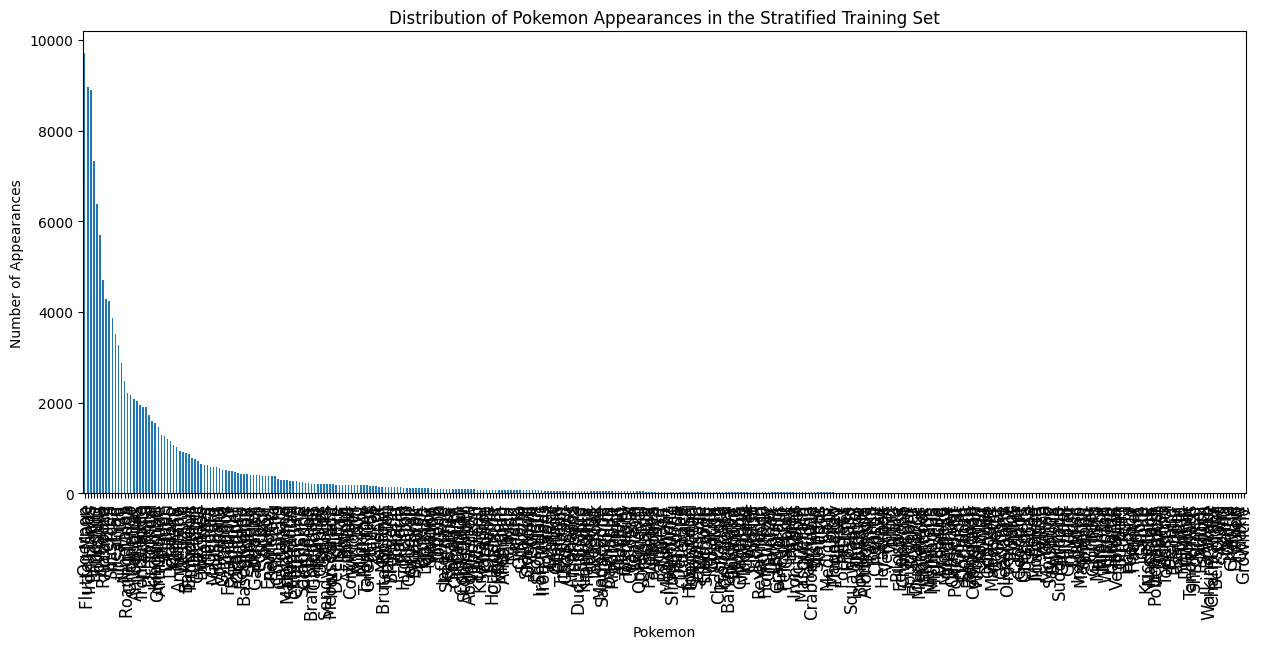

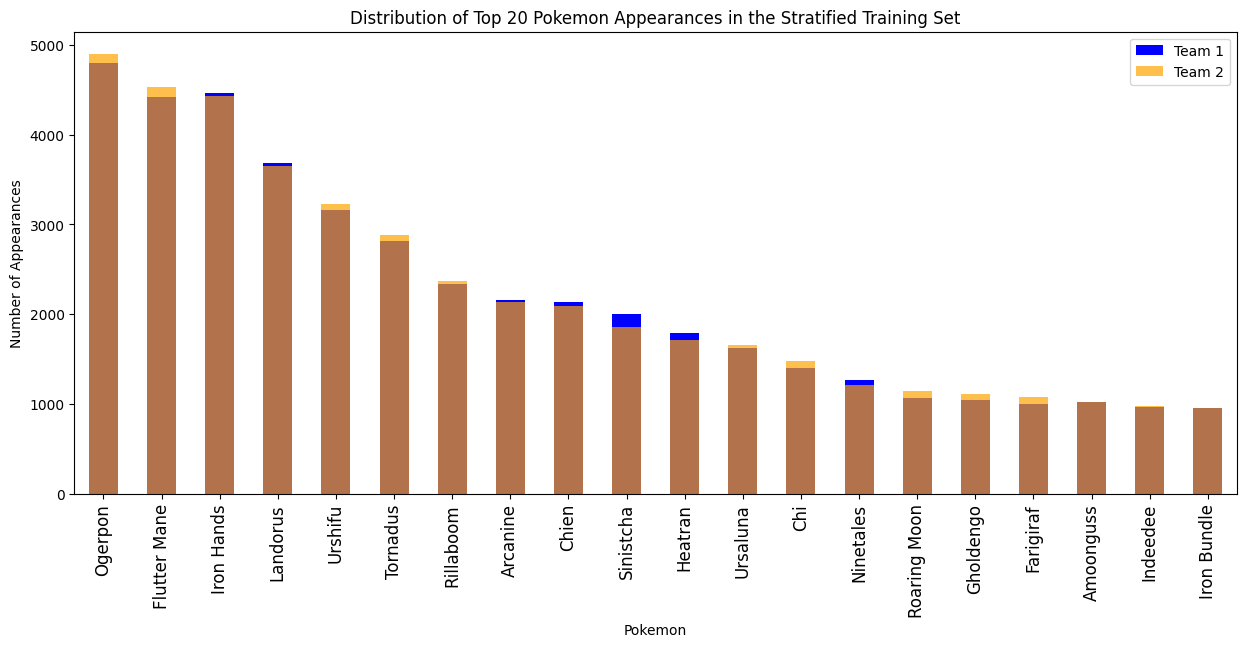

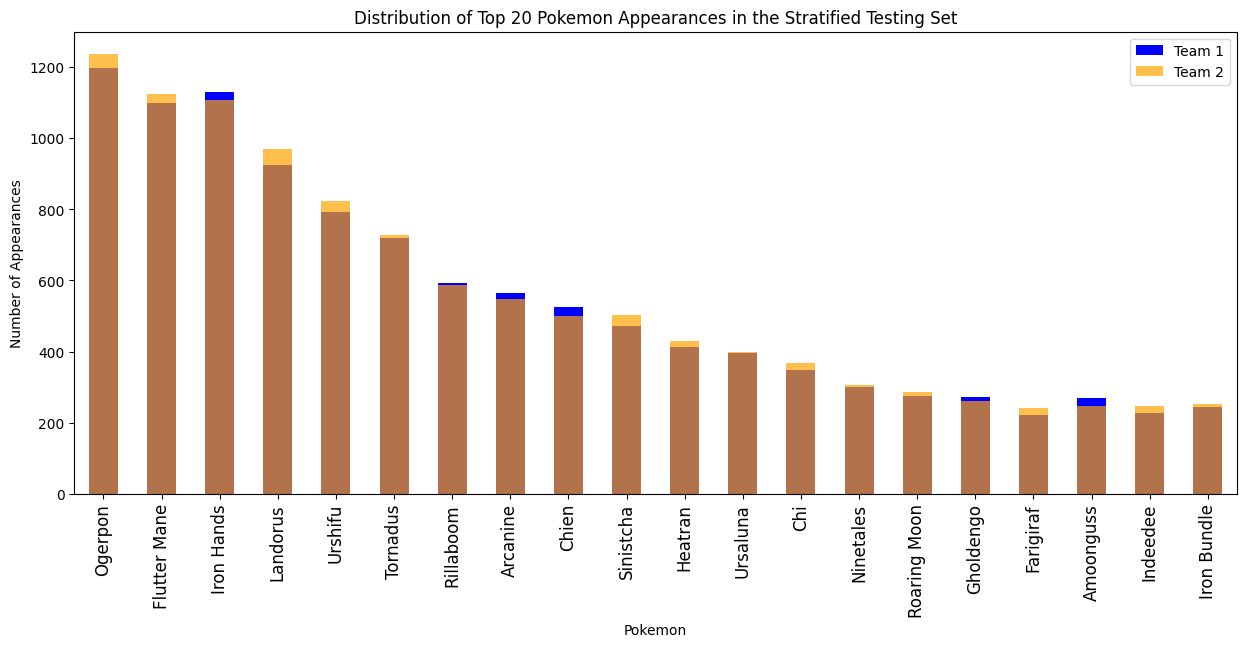

In [29]:
# Combine Pokemon names from both teams in the entire dataset
all_pokemon_names_stratified = (
    stratified_train_data['pokemon1_p1'] + ',' + stratified_train_data['pokemon2_p1'] + ',' +
    stratified_train_data['pokemon3_p1'] + ',' + stratified_train_data['pokemon4_p1'] + ',' +
    stratified_train_data['pokemon5_p1'] + ',' + stratified_train_data['pokemon6_p1'] + ',' +
    stratified_train_data['pokemon1_p2'] + ',' + stratified_train_data['pokemon2_p2'] + ',' +
    stratified_train_data['pokemon3_p2'] + ',' + stratified_train_data['pokemon4_p2'] + ',' +
    stratified_train_data['pokemon5_p2'] + ',' + stratified_train_data['pokemon6_p2']
).str.split(',')

# Flatten the list of Pokemon names
all_pokemon_flat_stratified = [pokemon for sublist in all_pokemon_names_stratified for pokemon in sublist]

# Count the occurrences of each Pokemon
pokemon_counts_stratified = pd.Series(all_pokemon_flat_stratified).value_counts()

# Plot the distribution of all Pokemon appearances for stratified split
plt.figure(figsize=(15, 6))
pokemon_counts_stratified.plot(kind='bar')
plt.title('Distribution of Pokemon Appearances in the Stratified Training Set')
plt.xlabel('Pokemon')
plt.ylabel('Number of Appearances')
plt.xticks(fontsize=12.0)  # Rotate x-axis labels
plt.show()

# Select the top 20 Pokemon
top_20_pokemon_stratified = pokemon_counts_stratified.head(20).index

# Now, check the distribution in the training set for the top 20 Pokemon for stratified split
train_pokemon_counts_p1_stratified = stratified_train_data[['pokemon1_p1', 'pokemon2_p1', 'pokemon3_p1', 'pokemon4_p1', 'pokemon5_p1', 'pokemon6_p1']].stack().value_counts()
train_pokemon_counts_p2_stratified = stratified_train_data[['pokemon1_p2', 'pokemon2_p2', 'pokemon3_p2', 'pokemon4_p2', 'pokemon5_p2', 'pokemon6_p2']].stack().value_counts()

# Plot the distribution in the training set for the top 20 Pokemon for stratified split
plt.figure(figsize=(15, 6))
train_pokemon_counts_p1_stratified.loc[top_20_pokemon_stratified].plot(kind='bar', color='blue', label='Team 1')
train_pokemon_counts_p2_stratified.loc[top_20_pokemon_stratified].plot(kind='bar', color='orange', label='Team 2', alpha=0.7)
plt.title('Distribution of Top 20 Pokemon Appearances in the Stratified Training Set')
plt.xlabel('Pokemon')
plt.ylabel('Number of Appearances')
plt.xticks(fontsize=12.0)  # Rotate x-axis labels
plt.legend()
plt.show()

# Check the distribution in the testing set for the top 20 Pokemon for stratified split
test_pokemon_counts_p1_stratified = stratified_test_data[['pokemon1_p1', 'pokemon2_p1', 'pokemon3_p1', 'pokemon4_p1', 'pokemon5_p1', 'pokemon6_p1']].stack().value_counts()
test_pokemon_counts_p2_stratified = stratified_test_data[['pokemon1_p2', 'pokemon2_p2', 'pokemon3_p2', 'pokemon4_p2', 'pokemon5_p2', 'pokemon6_p2']].stack().value_counts()

# Plot the distribution in the testing set for the top 20 Pokemon for stratified split
plt.figure(figsize=(15, 6))
test_pokemon_counts_p1_stratified.loc[top_20_pokemon_stratified].plot(kind='bar', color='blue', label='Team 1')
test_pokemon_counts_p2_stratified.loc[top_20_pokemon_stratified].plot(kind='bar', color='orange', label='Team 2', alpha=0.7)
plt.title('Distribution of Top 20 Pokemon Appearances in the Stratified Testing Set')
plt.xlabel('Pokemon')
plt.ylabel('Number of Appearances')
plt.xticks(fontsize=12.0)  # Rotate x-axis labels
plt.legend()
plt.show()

#### Construindo o Modelo

In [35]:
judge = keras.Sequential([
    keras.layers.StringLookup(vocabulary=vocabulary, mask_token=None),
    keras.layers.Embedding(input_dim=len(vocabulary) + 1, output_dim=256, input_length=6),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(1)
])

t1 = keras.Input(shape=(6,), dtype='string')
t2 = keras.Input(shape=(6,), dtype='string')

s1 = judge(t1)
s2 = judge(t2)

d = keras.layers.Subtract()([s1, s2])

model = keras.Model(inputs=[t1, t2], outputs=d)
model_stratified = keras.Model(inputs=[t1, t2], outputs=d)

In [36]:
model.compile(
    optimizer="adam",
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model_stratified.compile(
    optimizer="adam",
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [37]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, 1)            104737      ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 2)            0           ['sequential_3[0][0]',     

In [38]:
model_stratified.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential_3 (Sequential)      (None, 1)            104737      ['input_7[0][0]',                
                                                                  'input_8[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 2)            0           ['sequential_3[0][0]',     

#### Treinando o Modelo e Avaliando

Nesta etapa serão treinados dois modelos, um utilizando os dados originais e outro utilizando dados stratificados. Após o treinamento, os modelos serão avaliados e comparados.

In [39]:
model_stratified.fit([X_train_p1_stratified, X_train_p2_stratified], y_train_stratified, epochs=100, verbose=1, batch_size=64, validation_split=0.2)
model.fit([X_train_p1, X_train_p2], y_train, epochs=100, verbose=1, batch_size=64, validation_split=0.2)

Epoch 1/100


ValueError: in user code:

    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/engine/training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/engine/training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/engine/training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/engine/training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/engine/compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/losses.py", line 2156, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "/Users/antonioamaralegydiomartins/Developer/Insper/Eletivas/Machine Learning/Projeto-2 (Pokemon)/Pokemon-VGC-Team-Builder/env/lib/python3.10/site-packages/keras/backend.py", line 5707, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((None, 2) vs (None, 1)).


In [25]:
model_stratified.evaluate([X_test_p1_stratified, X_test_p2_stratified], y_test_stratified, verbose=1)

90/90 [==============================] - 0s 2ms/step - loss: 0.6272 - accuracy: 0.6389


[0.6271795034408569, 0.6388599276542664]

In [26]:
model.evaluate([X_test_p1, X_test_p2], y_test, verbose=1)

90/90 [==============================] - 0s 2ms/step - loss: 0.7135 - accuracy: 0.5836


[0.7134743928909302, 0.583594024181366]